<a href="https://colab.research.google.com/github/HosseinSadeghi-dev/machine-learning/blob/main/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [23]:
class MyKNearestNeighbors:
    def __init__(self, k):
        self.k = k
        self.x_train = None
        self.y_train = None
        self.number_class = None

    # train
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.number_class = len(np.unique(y_train))

    def nearest_neighbors(self, x_test):
        distance = np.sqrt(np.sum((x_test - self.x_train) ** 2, axis=1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor

    # test
    def predict(self, x_test):
        near_neighbor = self.nearest_neighbors(x_test)
        return np.argmax(np.bincount(self.y_train[near_neighbor]))

    def evaluate(self, x_test, y_test):
        y_pred = []
        for i in range(len(x_test)):
            y = self.predict(x_test[i])
            y_pred.append(y)
        not_correct = abs(sum(y_pred - y_test))
        print((((len(y_pred) - not_correct) * 100) / len(y_pred)) / 100)

In [31]:
N = 1000
std = 0.5

banana_width = np.random.normal(4, std, N)
banana_length = np.random.normal(8, std, N)

apple_width = np.random.normal(6, std, N)
apple_length = np.random.normal(6, std + 0.2, N)

width = np.concatenate((banana_width, apple_width))
length = np.concatenate((banana_length, apple_length))

banana_label = np.zeros(N, dtype='int')
apple_label = np.ones(N, dtype='int')

X = np.array([width, length]).T
Y = np.concatenate((banana_label, apple_label))

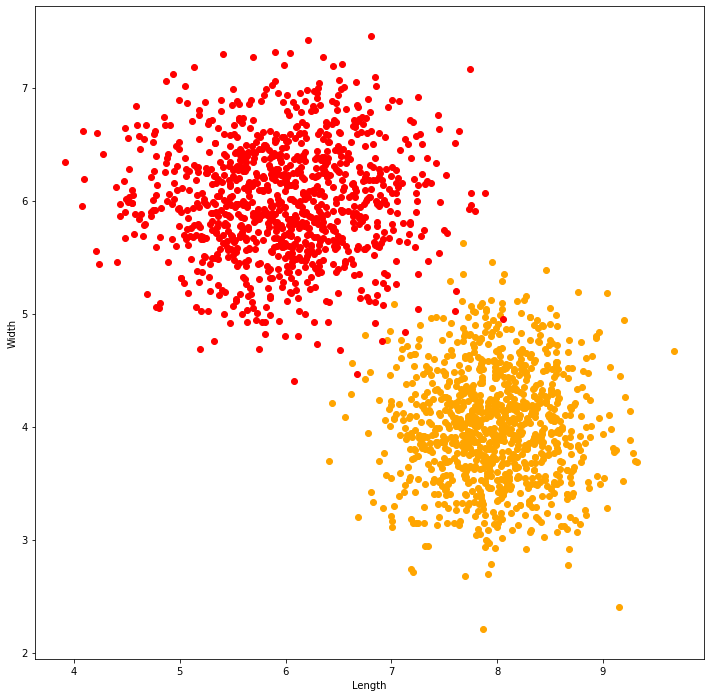

In [32]:
# test data
test_banana_width = np.random.normal(4, std, 100)
test_banana_length = np.random.normal(8, std, 100)

test_apple_width = np.random.normal(6, std, 100)
test_apple_length = np.random.normal(6, std + 0.1, 100)

test_width = np.concatenate((test_banana_width, test_apple_width))
test_length = np.concatenate((test_banana_length, test_apple_length))

test_banana_label = np.zeros(100, dtype='int')
test_apple_label = np.ones(100, dtype='int')

X_test = np.array([test_width, test_length]).T
Y_test = np.concatenate((test_banana_label, test_apple_label))

plt.figure(figsize=(12, 12))

plt.scatter(X[0:N, 1], X[0:N, 0], c='orange', label='banana')
plt.scatter(X[N:2 * N, 1], X[N:2 * N, 0], c='red', label='apple')

plt.xlabel('Length')
plt.ylabel('Width')

fruits = {
    0: 'موز',
    1: 'سیب'
}

In [33]:
knn = MyKNearestNeighbors(5)
knn.fit(X, Y)
knn.evaluate(X_test, Y_test)

1.0


In [34]:
knc = KNeighborsClassifier(5)
knc.fit(X, Y)
print(knc.score(X_test, Y_test))

0.99
